In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import dtreeviz

In [3]:
#データ読み込み
train = pd.read_csv("../dataset/train.csv")
test = pd.read_csv("../dataset/test.csv")
gender_submission = pd.read_csv("../dataset/gender_submission.csv")

#特徴量エンジニアリング
#train
t_train = train["Survived"]
train["FamilySize"] = train["SibSp"] + train["Parch"] 
x_train = train[["Pclass","Sex","Age","FamilySize","Fare","Embarked"]]
x_train["Sex"].replace(["male","female"],[0,1],inplace=True)
# Embarkedをonehot変換
Embarked = pd.get_dummies(x_train["Embarked"])
Embarked.replace([False,True],[0,1],inplace=True)
x_train = x_train.drop(columns=['Embarked'])
x_train = pd.concat([x_train,Embarked],axis = 1)
x_train.fillna(x_train.mean(), inplace=True)
#正規化
x_train = (x_train - x_train.mean()) / x_train.std()
x_train
#test
test["FamilySize"] = test["SibSp"] + test["Parch"] 
x_test = test[["Pclass","Sex","Age","FamilySize","Fare","Embarked"]]
x_test["Sex"].replace(["male","female"],[0,1],inplace=True)
# Embarkedをonehot変換
Embarked = pd.get_dummies(x_test["Embarked"])
Embarked.replace([False,True],[0,1],inplace=True)
x_test = x_test.drop(columns=['Embarked'])
x_test = pd.concat([x_test,Embarked],axis = 1)
x_test.fillna(x_test.mean(), inplace=True)
#正規化
x_test = (x_test - x_test.mean()) / x_test.std()
x_test

C:\Users\logihaal\AppData\Local\Temp\ipykernel_19388\2187756855.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


C:\Users\logihaal\AppData\Local\Temp\ipykernel_19388\2187756855.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
C:\Users\logihaal\AppData\Local\Temp\ipykernel_19388\2187756855.py:11:

,Pclass,Sex,Age,FamilySize,Fare,C,Q,S
0,0.872436,-0.755024,0.334592,-0.552780,-0.497811,-0.567462,2.840354,-1.349059
1,0.872436,1.321292,1.323944,0.105516,-0.512660,-0.567462,-0.351227,0.739484
2,-0.315441,-0.755024,2.511166,-0.552780,-0.464532,-0.567462,2.840354,-1.349059
3,0.872436,-0.755024,-0.259019,-0.552780,-0.482888,-0.567462,-0.351227,0.739484
4,0.872436,1.321292,-0.654760,0.763813,-0.417971,-0.567462,-0.351227,0.739484
...,...,...,...,...,...,...,...,...
413,0.872436,-0.755024,0.000000,-0.552780,-0.493856,-0.567462,-0.351227,0.739484
414,-1.503319,1.321292,0.690758,-0.552780,1.312180,1.758018,-0.351227,-1.349059
415,0.872436,-0.755024,0.651184,-0.552780,-0.508183,-0.567462,-0.351227,0.739484
416,0.872436,-0.755024,0.000000,-0.552780,-0.493856,-0.567462,-0.351227,0.739484


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

In [5]:
model = RandomForestClassifier(
    n_estimators=50, max_depth=3, random_state=777, bootstrap=True, oob_score=True
)

In [6]:
model.fit(x_train,t_train)

RandomForestClassifier(max_depth=3, n_estimators=50, oob_score=True,
                       random_state=777)

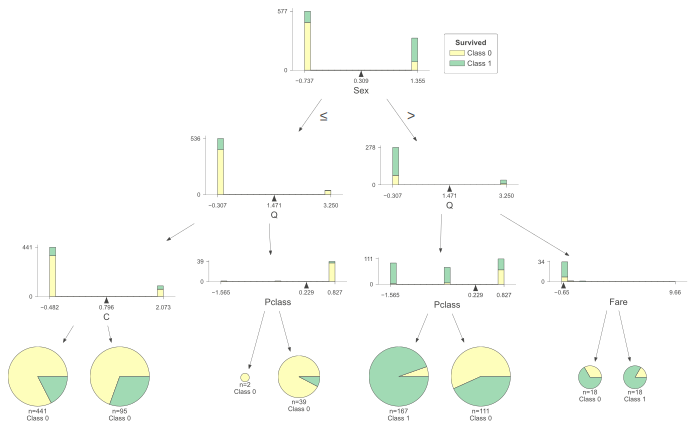

In [8]:
# 各決定木の視覚化

estimator = model.estimators_[1]
viz = dtreeviz.model(estimator, X_train=x_train, y_train=t_train, target_name="Survived", feature_names=x_train.columns)
viz.view()

In [9]:
t_train_pre = model.predict(x_train)

In [10]:
rf_score = roc_auc_score(t_train,t_train_pre)
print(f"テストデータでのROC-AUC = {rf_score}")

テストデータでのROC-AUC = 0.7829546543955518


C:\Users\logihaal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
C:\Users\logihaal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
C:\Users\logihaal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
C:\Users\logihaal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but DecisionTreeClassifier was f

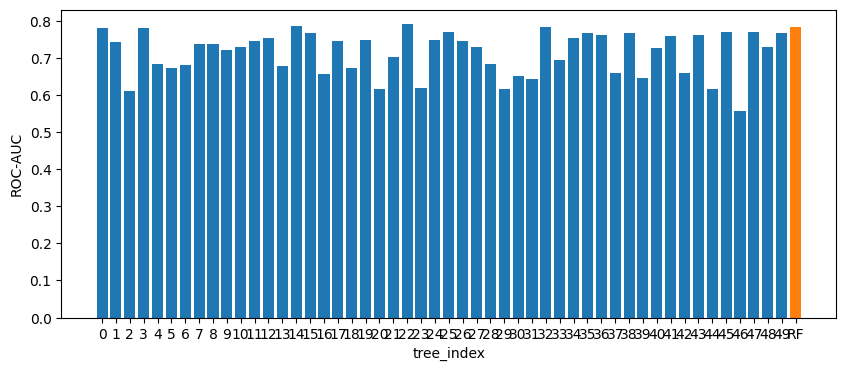

In [11]:
estimator_scores = []
for i in range(50):
    estimator = model.estimators_[i]
    estimator_pred = estimator.predict(x_train)
    estimator_scores.append(roc_auc_score(t_train, estimator_pred))

plt.figure(figsize=(10, 4))
bar_index = [i for i in range(len(estimator_scores))]
plt.bar(bar_index, estimator_scores)
plt.bar([50], rf_score)
plt.xticks(bar_index + [50], bar_index + ["RF"])
plt.xlabel("tree_index")
plt.ylabel("ROC-AUC")
plt.show()

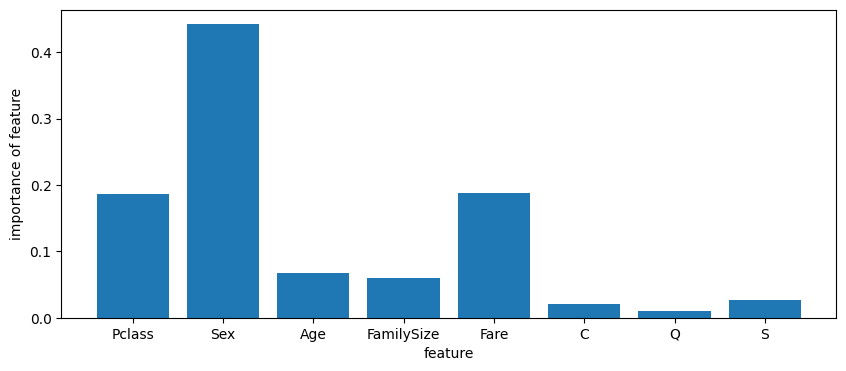

In [12]:
# 不純度(impurity)に基づいた重要度
plt.figure(figsize=(10, 4))
feature = [feat for feat in x_train.columns]
plt.bar(feature, model.feature_importances_)
plt.xlabel("feature")
plt.ylabel("importance of feature")
plt.show()

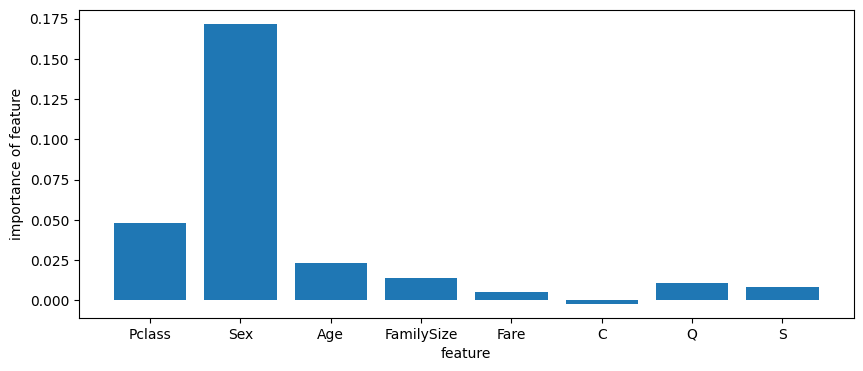

In [13]:
from sklearn.inspection import permutation_importance
# permutation_importance
p_imp = permutation_importance(
    model, x_train, t_train, n_repeats=10, random_state=77
).importances_mean

plt.figure(figsize=(10, 4))
plt.bar(feature, p_imp)
plt.xlabel("feature")
plt.ylabel("importance of feature")
plt.show()


In [14]:
t_test = model.predict(x_test)

In [15]:
x_test["Survived"] = t_test
t_output = x_test["Survived"]
t_output.index = t_output.index + 892
t_output.index.rename('PassengerId', inplace=True)
# DataFrameをCSVに出力
t_output.to_csv("output_RandomForest.csv")